**Навигация по уроку**

1. [Библиотеки Python для Data Science](https://colab.research.google.com/drive/1VKRkuVNaSRPy6uNRhWLIlfaTnLPuyWcC)
2. [Отзывы к фильмам (исследуем датасет IMDB)](https://colab.research.google.com/drive/1jL4XbkAMuMNVPXhfsE8Z2Z4h-sGtyAq1)
3. Домашняя работа

Используя базу данных фильмов из практической части урока, проверьте следующие гипотезы:

1. Большинство фильмов выпускаются по пятницам
2. Известные актеры снимаются в самых кассовых фильмах
3. Известные актеры снимаются в самыx дорогих фильмах

Построить графики по гипотезам. Сколько актеров из вашего результата вам знакомы?

In [2]:
#Напишите свое решение

# подключаем get и запрашиваем файл
from requests import get
response = get("https://storage.yandexcloud.net/academy.ai/the_movies_dataset.zip")

In [3]:
# создаем файл с этим названием, и пишем в него в бинарной форме
# используя итератор
with open('the_movies_dataset.zip', 'wb') as f:
    for chunk in response.iter_content(chunk_size=8192):
        f.write(chunk)

In [4]:
# Разархивация датасета в директорию 'the_movies_dataset'
!unzip -qo "the_movies_dataset.zip" -d ./the_movies_dataset

# Папка с распакованным датасетом
FILE_PATH = './the_movies_dataset'

In [5]:
# Для работы с файлами
import os

os.listdir(FILE_PATH)

['keywords.csv',
 'ratings_small.csv',
 'credits.csv',
 'movies_metadata.csv',
 'links.csv',
 'links_small.csv',
 'ratings.csv']

In [6]:
# отключаем предупреждения об ошибках
import warnings
warnings.filterwarnings('ignore')

In [7]:
import numpy as np
import pandas as pd

In [8]:
# создаем дата фрейм из файла и смотрим 10 первых строк в нем
df = pd.read_csv(f'{FILE_PATH}/movies_metadata.csv')

In [51]:
df.head()

,budget,id,original_language,original_title,overview,popularity,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count,year,week_day
0,30000000.0,862,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Toy Story,7.7,5415.0,1995,Monday
1,65000000.0,8844,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Jumanji,6.9,2413.0,1995,Friday
2,NaN,15602,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,1995-12-22,NaN,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Grumpier Old Men,6.5,92.0,1995,Friday
3,16000000.0,31357,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Waiting to Exhale,6.1,34.0,1995,Friday
4,NaN,11862,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Father of the Bride Part II,5.7,173.0,1995,Friday


In [50]:
df[df['title']=='Gone with the Wind']

,budget,id,original_language,original_title,overview,popularity,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count,year,week_day
893,4000000.0,770,en,Gone with the Wind,An American classic in which a manipulative wo...,14.240357,1939-12-15,400176459.0,238.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Gone with the Wind,7.7,995.0,1939,Friday


In [ ]:
# смотрим названия колнок
df.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

In [ ]:
# смотрим форму дата фрейма, в нашем случае это матрица 45к х 24
# будет меняться по ходу работы
df.shape

(45466, 15)

In [ ]:
# смотрим на характер значений в дата фрейме

# столбец non-null показывает количество заполненных полей в каждом столбце датафрейма
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   budget             45466 non-null  object 
 1   id                 45466 non-null  object 
 2   original_language  45455 non-null  object 
 3   original_title     45466 non-null  object 
 4   overview           44512 non-null  object 
 5   popularity         45461 non-null  object 
 6   release_date       45379 non-null  object 
 7   revenue            45460 non-null  float64
 8   runtime            45203 non-null  float64
 9   spoken_languages   45460 non-null  object 
 10  status             45379 non-null  object 
 11  title              45460 non-null  object 
 12  vote_average       45460 non-null  float64
 13  vote_count         45460 non-null  float64
dtypes: float64(4), object(10)
memory usage: 4.9+ MB


In [9]:
# уберем не используемые нами столбцы методом drop
df = df.drop(['imdb_id'], axis=1)
df = df.drop(['adult'], axis=1)
df = df.drop(['belongs_to_collection'], axis=1)
df = df.drop(['genres'], axis=1)
df = df.drop(['homepage'], axis=1)
df = df.drop(['poster_path'], axis=1)
df = df.drop(['production_companies'], axis=1)
df = df.drop(['production_countries'], axis=1)
df = df.drop(['tagline'], axis=1)
df = df.drop(['video'], axis=1)

In [ ]:
# посмотрим, сколько полей не заполнено в колонке revenue
# для этого применим маску

df[df['revenue']==0].shape

# получили (38052, 15), т.е. 38к полей из 45к не имеют данных о кассе

(38052, 15)

In [10]:
# отсеим фильмы без заполненного поля revenue
# для этого присвоим значение NaN через np.nan в полях с revenue == 0

df['revenue'] = df['revenue'].replace(0, np.nan)

In [ ]:
# проверим типы данных в полях budget и revenue
print("Тип столбца budget:", df.budget.dtypes)
print("Тип столбца revenue:", df.revenue.dtypes)

# в budget тип object говорит, что есть полы с нецифровыми значениями
# в revenue float64

Тип столбца budget: object
Тип столбца revenue: float64


In [11]:
# пробуем преобразовать поля budget в числовой формат
# с помощью пандас метода to_numeric
# если встретятся ошибки, то присвоить принудительно
df['budget'] = pd.to_numeric(df['budget'], errors='coerce')

In [12]:
# заменяем 0 на NaN в budget как в предыдущем случае с revenue
df['budget'] = df['budget'].replace(0, np.nan)

In [ ]:
# смотрим, сколько значений с NaN в budget
df[df['budget'].isnull()].shape

(36576, 15)

---
**ЗАДАЧА 1**

In [13]:
# добавим колонку год для удобства
df['year'] = pd.to_datetime(df['release_date'], errors='coerce').apply(lambda x: str(x).split('-')[0] if x != np.nan else np.nan)

In [14]:
# пробуем получить из даты выхода фильма день недели этой даты

# поменяем формат данных столбика даты релиза и добавим его в новый с названием week_day

df['week_day'] = pd.to_datetime(df['release_date'], format='%Y-%m-%d', errors='coerce')

In [ ]:
df['week_day'].info()

In [ ]:
# при конвертировании типа object в datetime появлялась ошибка конвертации
# т.к. в некоторых полях в дате стояла '1', проверим такое поле сейчас
value = df.iloc[19730]
value

,19730
budget,NaN
id,1997-08-20
original_language,104.0
original_title,"[{'iso_639_1': 'en', 'name': 'English'}]"
overview,Released
popularity,NaN
release_date,1
revenue,NaN
runtime,NaN
spoken_languages,NaN


In [15]:
# переведем дату в ее день недели
# используем dt.day_name()
df['week_day'] = df['week_day'].dt.day_name()

In [ ]:
df[['title', 'year', 'week_day']].head()

,title,year,week_day
0,Toy Story,1995,Monday
1,Jumanji,1995,Friday
2,Grumpier Old Men,1995,Friday
3,Waiting to Exhale,1995,Friday
4,Father of the Bride Part II,1995,Friday


In [16]:
# посчитаем, сколько выходило фильмов в разные дни недели
week_day_df=pd.DataFrame(df['week_day'].value_counts())
week_day_df.head()

,count
week_day,
Friday,13908
Thursday,7525
Wednesday,7035
Saturday,5151
Tuesday,4641


In [17]:
#перенесем значения из индекса в отдельный столбец для удобства
week_day_df['day']=week_day_df.index
week_day_df.head()

,count,day
week_day,,
Friday,13908,Friday
Thursday,7525,Thursday
Wednesday,7035,Wednesday
Saturday,5151,Saturday
Tuesday,4641,Tuesday


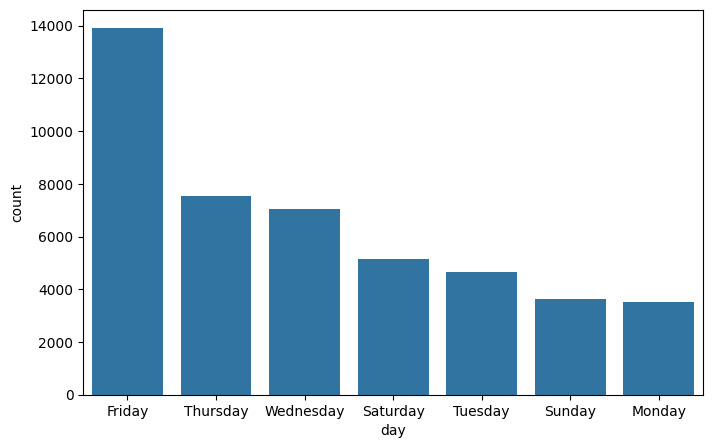

In [18]:
# построим график выпуска фильмов по дням недели
%matplotlib inline
import matplotlib.pyplot as plt # Библиотека для построения графиков
import seaborn as sns # Еще одна библиотека для построения графиков, работает как обертка над предыдущей

plt.figure(figsize=(8,5))
sns.barplot(x='day', y='count', data=week_day_df)
plt.show()

как мы видим на графике, по пятницам вышло 14 из 45 тысяч фильмов, что составляет почти треть от релизов и почти в 2 раза превышает второй показатель релизов по дням недели

---
**ЗАДАЧА 2**

In [19]:
# посмотрим, что у нас в файле credits
df_credits = pd.read_csv(f'{FILE_PATH}/credits.csv')
df_credits.head()

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862


In [ ]:
df_credits['cast'].iloc[0]

"[{'cast_id': 14, 'character': 'Woody (voice)', 'credit_id': '52fe4284c3a36847f8024f95', 'gender': 2, 'id': 31, 'name': 'Tom Hanks', 'order': 0, 'profile_path': '/pQFoyx7rp09CJTAb932F2g8Nlho.jpg'}, {'cast_id': 15, 'character': 'Buzz Lightyear (voice)', 'credit_id': '52fe4284c3a36847f8024f99', 'gender': 2, 'id': 12898, 'name': 'Tim Allen', 'order': 1, 'profile_path': '/uX2xVf6pMmPepxnvFWyBtjexzgY.jpg'}, {'cast_id': 16, 'character': 'Mr. Potato Head (voice)', 'credit_id': '52fe4284c3a36847f8024f9d', 'gender': 2, 'id': 7167, 'name': 'Don Rickles', 'order': 2, 'profile_path': '/h5BcaDMPRVLHLDzbQavec4xfSdt.jpg'}, {'cast_id': 17, 'character': 'Slinky Dog (voice)', 'credit_id': '52fe4284c3a36847f8024fa1', 'gender': 2, 'id': 12899, 'name': 'Jim Varney', 'order': 3, 'profile_path': '/eIo2jVVXYgjDtaHoF19Ll9vtW7h.jpg'}, {'cast_id': 18, 'character': 'Rex (voice)', 'credit_id': '52fe4284c3a36847f8024fa5', 'gender': 2, 'id': 12900, 'name': 'Wallace Shawn', 'order': 4, 'profile_path': '/oGE6JqPP2xH4t

In [ ]:
# посмотрим на тип данных в поле id
df_credits['id'].info()

# тип int64, подходит для объединения

<class 'pandas.core.series.Series'>
RangeIndex: 45476 entries, 0 to 45475
Series name: id
Non-Null Count  Dtype
--------------  -----
45476 non-null  int64
dtypes: int64(1)
memory usage: 355.4 KB


In [ ]:
# смотрим на основной датафрейм
df['id'].info()

# там у нас object, нужно конвертировать в int

<class 'pandas.core.series.Series'>
RangeIndex: 45466 entries, 0 to 45465
Series name: id
Non-Null Count  Dtype 
--------------  ----- 
45466 non-null  object
dtypes: object(1)
memory usage: 355.3+ KB


In [20]:
def convert_int(x):
    try:
        return int(x)
    except:
        return np.nan

df['id'] = df['id'].apply(convert_int)  # Преобразуем к int

In [21]:
# удалим строки со значением NaN в поле id
df = df.drop(df[df['id'].isnull()].index)

In [22]:
df['id'] = df['id'].astype('int')

In [23]:
# объединяем фреймы методом merge
df_merge = df.merge(df_credits, on='id')

In [24]:
# сделаем словарь из значений столбца cast
import ast
df_merge['cast'] = df_merge['cast'].apply(ast.literal_eval)

In [ ]:
df_merge.columns

In [25]:
# нам понадобится поле name

def get_actors(x):
    actors=[]
    for i in x:
        actors.append(i['name'])
    return actors

df_merge['cast'] = df_merge['cast'].apply(get_actors)

# если делать через добавление к строке, то в итоге будет один большой элемент типа str

In [26]:
# уберем из списка все фильмы, по которым нет данных по кассе и бюджету
df_merge = df_merge.dropna(subset=['budget'])
df_merge = df_merge.dropna(subset=['revenue'])

In [ ]:
df_merge['cast'].iloc[0]

['Tom Hanks',
 'Tim Allen',
 'Don Rickles',
 'Jim Varney',
 'Wallace Shawn',
 'John Ratzenberger',
 'Annie Potts',
 'John Morris',
 'Erik von Detten',
 'Laurie Metcalf',
 'R. Lee Ermey',
 'Sarah Freeman',
 'Penn Jillette']

Предположим, что изветсность актера определяется количеством сыгранных ролей в различных фильмах. Посчитаем, в скольки фильмах снимался каждый актер.

In [27]:
# возьмем копию df_merge, чтобы проводить преобразования в ней
df_analysis = df_merge[['title','budget','revenue','cast','year']].copy()

In [32]:
df_analysis['year'].min()

'1915'

In [ ]:
df_analysis[df_analysis['year']<'1935']

In [33]:
df_analysis['year'].max()

'2017'

In [28]:
df_analysis.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5393 entries, 0 to 45494
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   title    5393 non-null   object 
 1   budget   5393 non-null   float64
 2   revenue  5393 non-null   float64
 3   cast     5393 non-null   object 
 4   year     5393 non-null   object 
dtypes: float64(2), object(3)
memory usage: 252.8+ KB


In [ ]:
df_analysis['cast'].explode("cast").head(3)

,cast
0,Tom Hanks
1,Tim Allen
2,Don Rickles


In [37]:
# посчитаем количество сыгранных ролей
df_acts = pd.DataFrame(df_analysis['cast'].explode("cast").value_counts())

In [38]:
df_acts['cast'] = df_acts.index

In [ ]:
df_acts

In [ ]:
df_acts.info()

<class 'pandas.core.frame.DataFrame'>
Index: 65003 entries, Samuel L. Jackson to Tatyana Dogileva
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   count   65003 non-null  int64
dtypes: int64(1)
memory usage: 3.0+ MB


In [45]:
df_acts[df_acts['cast'] == 'Clark Gable']

,count,cast
cast,,
Clark Gable,6,Clark Gable


In [53]:
df_acts['count'].quantile(0.98)

11.0

In [52]:
df_acts[df_acts['count']>11].shape

(1119, 2)

Как можно видеть из анализа процентиля, только 2% актеров снялись больше чем в 11 фильмах в период с 1915 по 2017 год.
В числовом выражении это около 1000 человек из 65 тысяч всех актеров данного фрейма, возьмем эту цифру за показатель известности актера.

Построим несколько графиков для фильмов, разбив их по блокам примерно по 20 лет на года 1917-1935, 1935-1960, 1960-1980, 1980-2000, 2000-2017. Блоки используем для того, чтобы инфляция валюты не сильно сказывалась на разбросе показателей бюджета/кассы, а так же т.к. список актуальных актеров так же будет различаться по годам.

По оси X отобразим бюджет, по оси Y кассу, точкой на графике отметим фильм, если в нем участвует один из актеров из списка популярных, то выделим ее цветом.

In [58]:
df_analysis['cast'].explode('cast').head()

,cast
0,Tom Hanks
1,Tim Allen
2,Don Rickles
3,Jim Varney
4,Wallace Shawn


In [65]:
# добавим колонку, где посчитаем, сколько известных актеров снималось в каждом фильме

def count_actors(x):
    count=0
    for i in x:
        if i in df_acts['cast'].iloc[:1000]:
            count += 1
    return count


df_analysis['known actors'] = df_analysis['cast'].apply(count_actors)

In [67]:

df_analysis.head()

,title,budget,revenue,cast,year,known actors
0,Toy Story,30000000.0,373554033.0,"[Tom Hanks, Tim Allen, Don Rickles, Jim Varney...",1995,5
1,Jumanji,65000000.0,262797249.0,"[Robin Williams, Jonathan Hyde, Kirsten Dunst,...",1995,5
3,Waiting to Exhale,16000000.0,81452156.0,"[Whitney Houston, Angela Bassett, Loretta Devi...",1995,5
5,Heat,60000000.0,187436818.0,"[Al Pacino, Robert De Niro, Val Kilmer, Jon Vo...",1995,18
8,Sudden Death,35000000.0,64350171.0,"[Jean-Claude Van Damme, Powers Boothe, Dorian ...",1995,2


In [56]:
df_analysis.sort_values('year', ascending=True).head()

,title,budget,revenue,cast,year
8306,The Cheat,17311.0,137365.0,"[Fannie Ward, Jack Dean, Sessue Hayakawa, Jame...",1915
6924,The Birth of a Nation,100000.0,11000000.0,"[Lillian Gish, Mae Marsh, Henry B. Walthall, M...",1915
13023,"20,000 Leagues Under the Sea",200000.0,8000000.0,"[Lois Alexander, Curtis Benton, Wallace Clarke...",1916
35981,Mickey,250000.0,8000000.0,"[Mabel Normand, George Nichols, Wheeler Oakman...",1918
3197,The Kid,250000.0,2500000.0,"[Charlie Chaplin, Jackie Coogan, Edna Purvianc...",1921


---
**Посмотрим на киноиндустрию в период до 1935 года.**

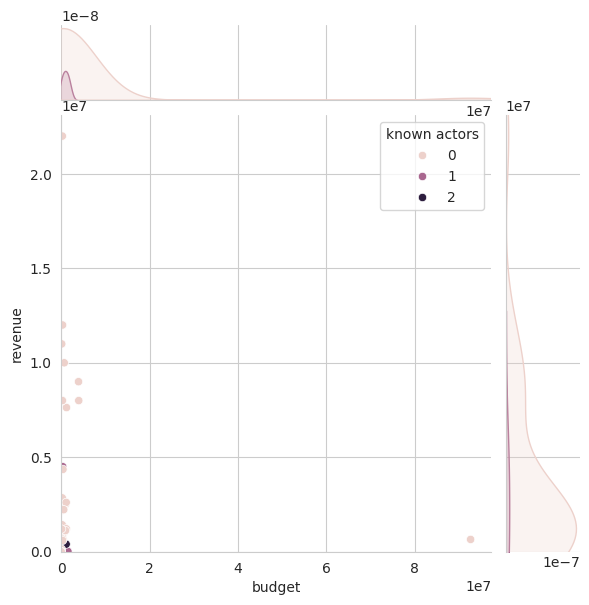

In [153]:
%matplotlib inline
import matplotlib.pyplot as plt # Библиотека для построения графиков
import seaborn as sns # Еще одна библиотека для построения графиков, работает как обертка над предыдущ

sns.set_style("whitegrid")
sns.jointplot(x='budget', y='revenue', hue='known actors', data=df_analysis[df_analysis['year']<'1935'], kind='scatter') # график совместного распределения по двум переменным
plt.xlim(0, df_analysis[df_analysis['year']<'1935']['budget'].max()*1.05) # Ограничим ось Х диапазоном от 0 до максимального значения выборки + 5%
plt.ylim(0, df_analysis[df_analysis['year']<'1935']['revenue'].max()*1.05) # Ограничим ось Y
plt.show() # Показать построенный график

Как видим, на графике есть точки, уводящие наш предел бюджета и кассы далеко за основное распределение. Рассмотрим основное распределение вблизи.

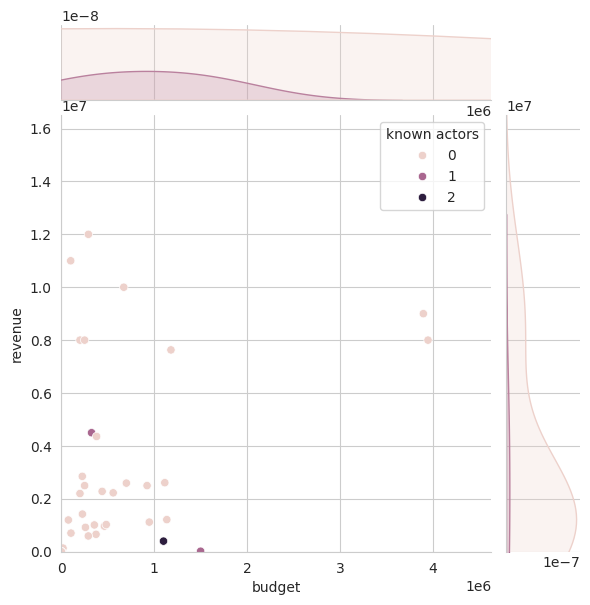

In [154]:
sns.set_style("whitegrid")
sns.jointplot(x='budget', y='revenue', hue='known actors', data=df_analysis[df_analysis['year']<'1935'], kind='scatter') # график совместного распределения по двум переменным
plt.xlim(0, df_analysis[df_analysis['year']<'1935']['budget'].max()*0.05) # Ограничим ось 5% от выборки
plt.ylim(0, df_analysis[df_analysis['year']<'1935']['revenue'].max()*0.75) # Ограничим ось 75% от выборки
plt.show() # Показать построенный график

Как можно было ожидать, в период 1917-1935 киноиндустрия еще не была развита, всего в 3 фильмах участвовали актеры, которые уже сыграли несколько ролей



---


**Теперь посмотрим на индустрию в период 1935-1960**

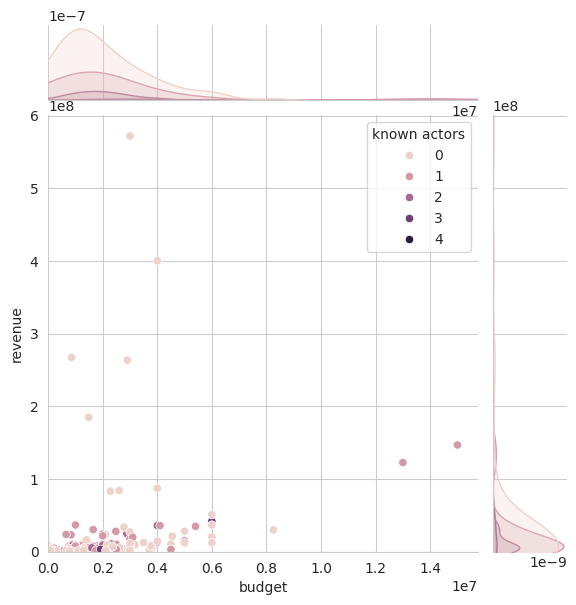

In [141]:
sns.set_style("whitegrid")
sns.jointplot(x='budget', y='revenue', hue='known actors', data=df_analysis[(df_analysis['year']>='1935')&(df_analysis['year']<'1960')], kind='scatter')
plt.xlim(0, df_analysis[(df_analysis['year']>='1935')&(df_analysis['year']<'1960')]['budget'].max()*1.05)
plt.ylim(0, df_analysis[(df_analysis['year']>='1935')&(df_analysis['year']<'1960')]['revenue'].max()*1.05)
plt.show()

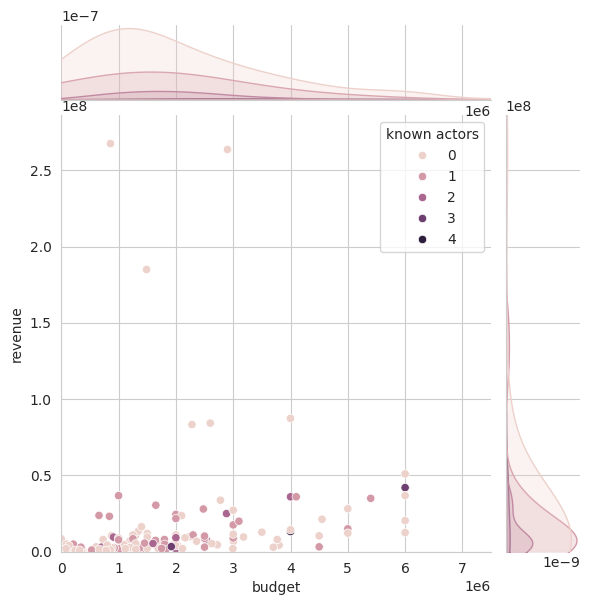

In [142]:
sns.set_style("whitegrid")
sns.jointplot(x='budget', y='revenue', hue='known actors', data=df_analysis[(df_analysis['year']>='1935')&(df_analysis['year']<'1960')], kind='scatter')
plt.xlim(0, df_analysis[(df_analysis['year']>='1935')&(df_analysis['year']<'1960')]['budget'].max()*0.5)
plt.ylim(0, df_analysis[(df_analysis['year']>='1935')&(df_analysis['year']<'1960')]['revenue'].max()*0.5)
plt.show()

Видим, что появляются актеры знаменитости, но далеко не все высокобюджетные фильмы сняты с ними.
В основной массе известные актеры снимаются в среднебюджетных фильмах.

Так же можно отметить что наибольшую кассу собрали фильмы, в которых даже не было известных актеров.

---
**период 1960-1980 года**

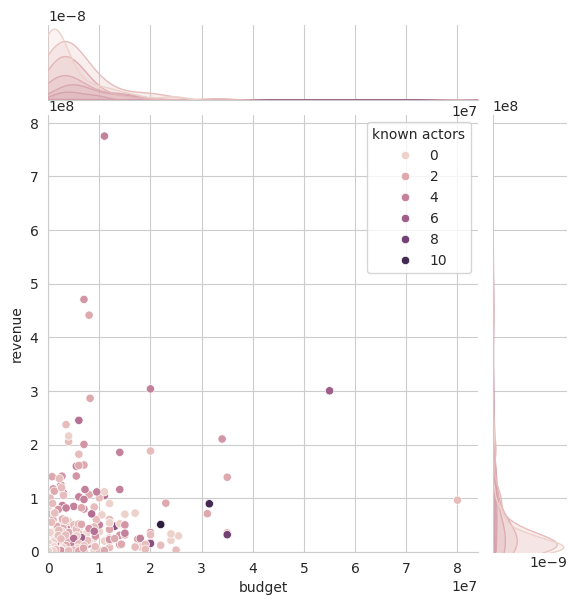

In [145]:
sns.set_style("whitegrid")
sns.jointplot(x='budget', y='revenue', hue='known actors', data=df_analysis[(df_analysis['year']>='1960')&(df_analysis['year']<'1980')], kind='scatter')
plt.xlim(0, df_analysis[(df_analysis['year']>='1960')&(df_analysis['year']<'1980')]['budget'].max()*1.05)
plt.ylim(0, df_analysis[(df_analysis['year']>='1960')&(df_analysis['year']<'1980')]['revenue'].max()*1.05)
plt.show()

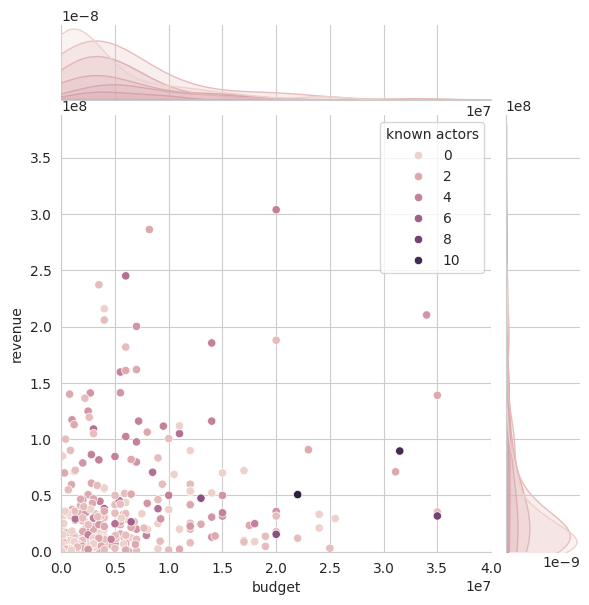

In [146]:
sns.set_style("whitegrid")
sns.jointplot(x='budget', y='revenue', hue='known actors', data=df_analysis[(df_analysis['year']>='1960')&(df_analysis['year']<'1980')], kind='scatter')
plt.xlim(0, df_analysis[(df_analysis['year']>='1960')&(df_analysis['year']<'1980')]['budget'].max()*0.5)
plt.ylim(0, df_analysis[(df_analysis['year']>='1960')&(df_analysis['year']<'1980')]['revenue'].max()*0.5)
plt.show()

Видим примерно схожую картину как и в период 1935-1960, но количество известных людей растет. а так же растет количество отснятых фильмов. Наиболее изветые актеры снимались в высокобюджетных фильмах того времени.

Однако на показателе доходности количество звезд в фильме могло не сказываться. Достаточно было всего 2-4 звезд, чтобы фильм собрал большую кассу

---
**Период 1980-2000**

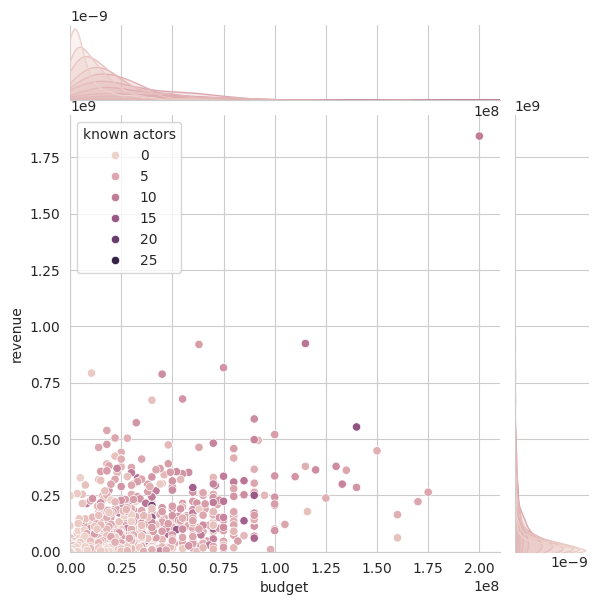

In [147]:
sns.set_style("whitegrid")
sns.jointplot(x='budget', y='revenue', hue='known actors', data=df_analysis[(df_analysis['year']>='1980')&(df_analysis['year']<'2000')], kind='scatter')
plt.xlim(0, df_analysis[(df_analysis['year']>='1980')&(df_analysis['year']<'2000')]['budget'].max()*1.05)
plt.ylim(0, df_analysis[(df_analysis['year']>='1980')&(df_analysis['year']<'2000')]['revenue'].max()*1.05)
plt.show()

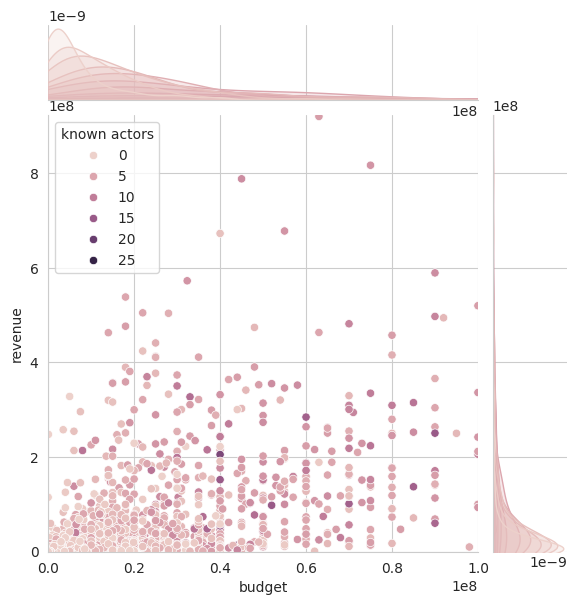

In [148]:
sns.set_style("whitegrid")
sns.jointplot(x='budget', y='revenue', hue='known actors', data=df_analysis[(df_analysis['year']>='1980')&(df_analysis['year']<'2000')], kind='scatter')
plt.xlim(0, df_analysis[(df_analysis['year']>='1980')&(df_analysis['year']<'2000')]['budget'].max()*0.5)
plt.ylim(0, df_analysis[(df_analysis['year']>='1980')&(df_analysis['year']<'2000')]['revenue'].max()*0.5)
plt.show()

Видим, что количество фильмов значительно выросло, основная их масса сосредоточена в сегменте до 100 млн бюджета, в котором известные актеры в большей массе начинают сниматься в фильмах с бюджетом от 40 млн. низкобюджетные фильмы все меньше привлекают известных людей.

Доход, однако, все так же менее зависим от состава.


---
**Период после 2000**

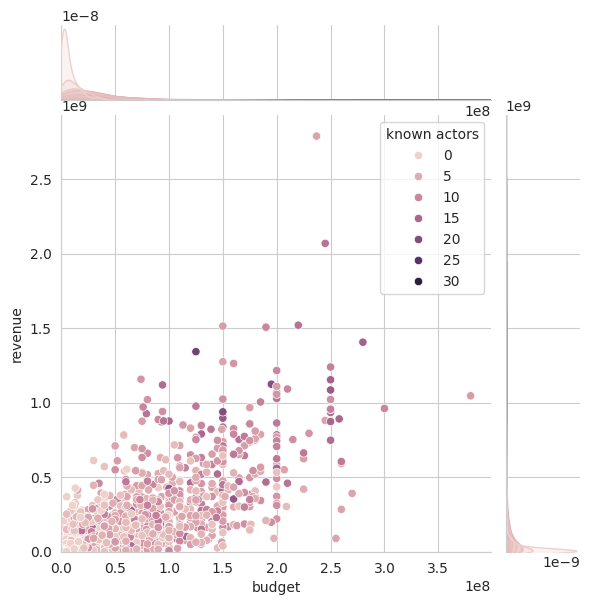

In [151]:
sns.set_style("whitegrid")
sns.jointplot(x='budget', y='revenue', hue='known actors', data=df_analysis[df_analysis['year']>='2000'], kind='scatter')
plt.xlim(0, df_analysis[df_analysis['year']>='2000']['budget'].max()*1.05)
plt.ylim(0, df_analysis[df_analysis['year']>='2000']['revenue'].max()*1.05)
plt.show()

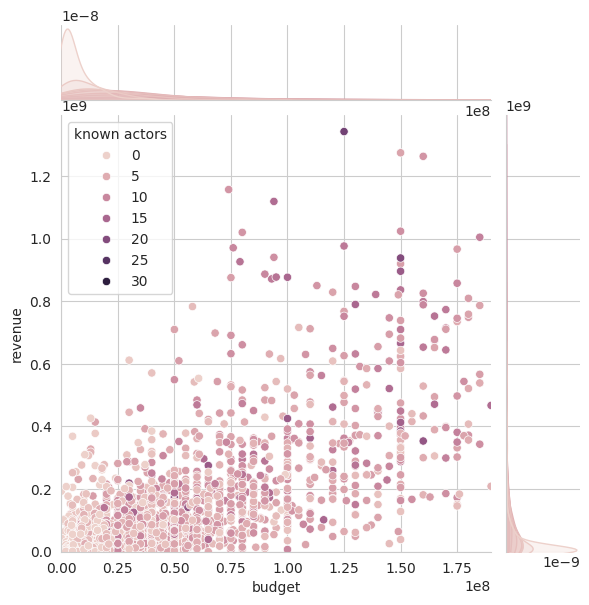

In [152]:
sns.set_style("whitegrid")
sns.jointplot(x='budget', y='revenue', hue='known actors', data=df_analysis[df_analysis['year']>='2000'], kind='scatter')
plt.xlim(0, df_analysis[df_analysis['year']>='2000']['budget'].max()*.5)
plt.ylim(0, df_analysis[df_analysis['year']>='2000']['revenue'].max()*.5)
plt.show()

Видим, что высокобюджетные фильмы значительно увеличили найм знаменитых актеров. Но встречаются и фильмы без осбого количества звезд.

Так же выросла касса высокобюджетных фильмов со знаменитостями.

---
**полный график распределения без фильтов по годам**

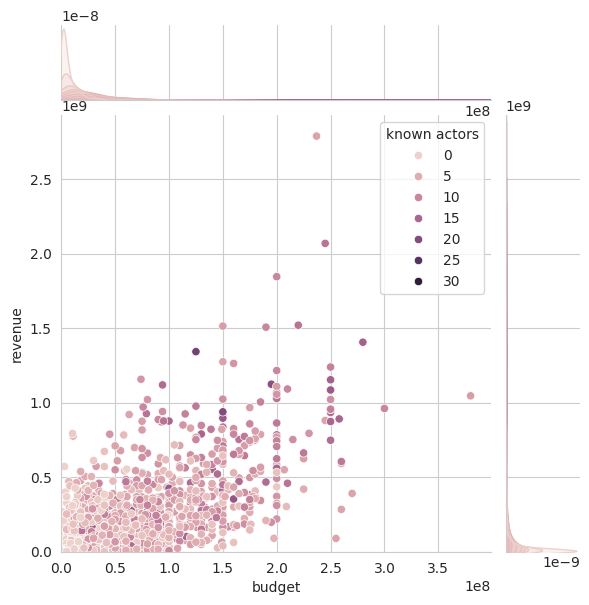

In [156]:
sns.set_style("whitegrid")
sns.jointplot(x='budget', y='revenue', hue='known actors', data=df_analysis, kind='scatter')
plt.xlim(0, df_analysis['budget'].max()*1.05)
plt.ylim(0, df_analysis['revenue'].max()*1.05)
plt.show()

**Общий вывод**

Можно сказать, что знаменитости снимаются в самых дорогих фильмах, это обусловлено тем, что стоимость найма таких актеров выше.

Однако, количество звезд в фильме не гарантирует того, что фильм соберет большую кассу.

Кассу могут собрать и фильмы, в которых знаменитостей может быть очень мало, или не быть.